In [63]:
# Import necessary libraries
import pandas as pd

# File paths for the uploaded datasets
customers_file = 'customers.csv'
products_file = 'Products.csv'
transactions_file = 'Transactions.csv'

# Load datasets
customers = pd.read_csv(customers_file)
products = pd.read_csv(products_file)
transactions = pd.read_csv(transactions_file)



In [64]:
# Display the first few rows of each dataset to check the structure and contents
customers_head = customers.head(2)
products_head = products.head(2)
transactions_head = transactions.head(2)

(customers_head, products_head, transactions_head)

(  CustomerID      CustomerName         Region  SignupDate
 0      C0001  Lawrence Carroll  South America  2022-07-10
 1      C0002    Elizabeth Lutz           Asia  2022-02-13,
   ProductID            ProductName     Category  Price
 0      P001   ActiveWear Biography        Books  169.3
 1      P002  ActiveWear Smartwatch  Electronics  346.3,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  )

In [65]:
# Check for missing values and data types in all datasets
customers_info = customers.info()
products_info = products.info()
transactions_info = transactions.info()

(customers_info, products_info, transactions_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(None, None, None)

In [66]:
customers_missing = customers.isnull().sum()
products_missing = products.isnull().sum()
transactions_missing = transactions.isnull().sum()

(customers_missing, products_missing, transactions_missing)

(CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64)

In [67]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')


Customer Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


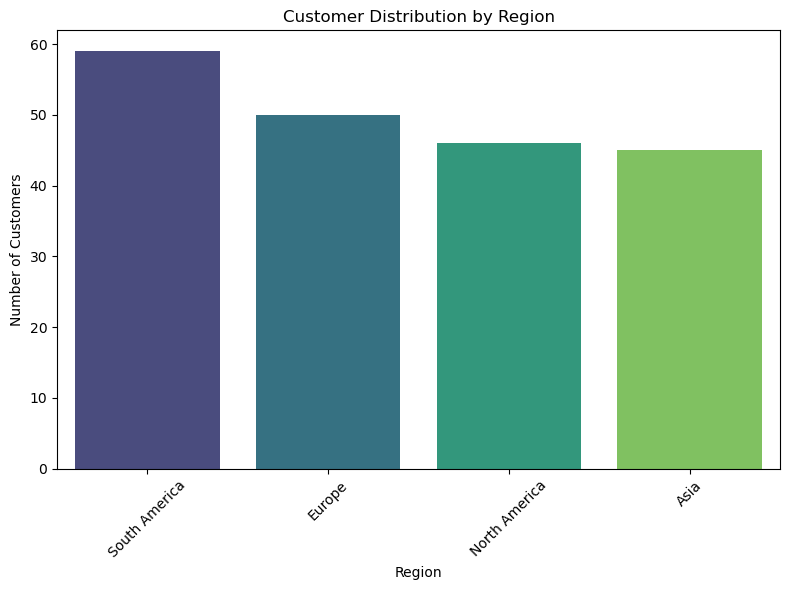

In [68]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Customer Demographics Analysis
print("Customer Region Distribution:")
print(customers['Region'].value_counts())

# Plot Customer Region Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x="Region", palette="viridis", order=customers['Region'].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total Number of Products in the products data is 66

Top 15 Products by Sales:
                         TotalSales  QuantitySold
ProductName                                      
ActiveWear Smartwatch      39096.97           100
SoundWave Headphones       25211.64            97
SoundWave Novel            24507.90            58
ActiveWear Jacket          22712.56            76
ActiveWear Rug             22314.43            79
TechPro Headphones         19513.80            45
BookWorld Cookbook         19221.99            48
BookWorld Sweater          18743.79            47
TechPro Textbook           18267.96            62
ActiveWear Cookware Set    18083.73            51
SoundWave Desk Lamp        17920.10            64
TechPro Cookbook           17905.20            43
ActiveWear Textbook        17257.86            58
HomeSense Desk Lamp        15701.32            81
SoundWave Cookbook         15102.72            78


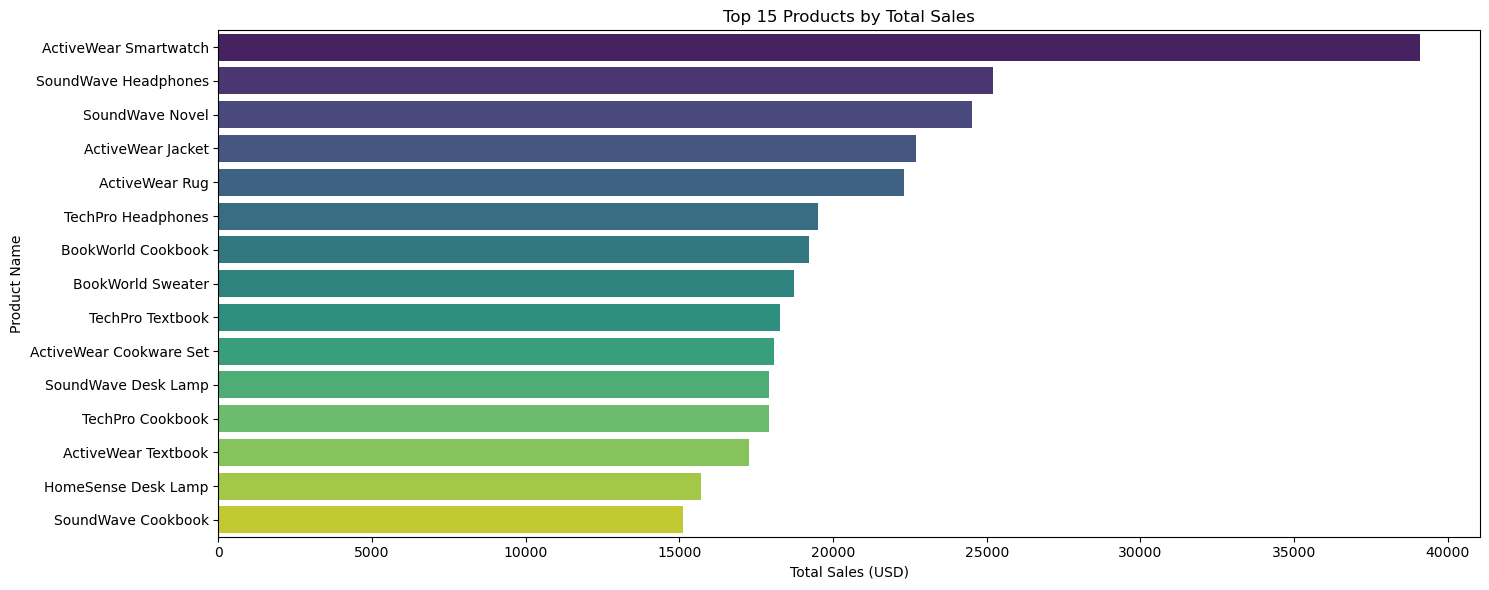

In [69]:
# 2. Product Performance Analysis
products_counts=products['ProductName'].value_counts()
print("Total Number of Products in the products data is "+str(len(products_counts)))
transactions_products = transactions.merge(products, on='ProductID', how='left')
product_sales = transactions_products.groupby('ProductName').agg(
    TotalSales=('TotalValue', 'sum'),
    QuantitySold=('Quantity', 'sum')
).sort_values(by='TotalSales', ascending=False)

print("\nTop 15 Products by Sales:")
print(product_sales.head(15))

# Plot Top 10 Products
top_15_products = product_sales.head(15)
plt.figure(figsize=(15, 6))
sns.barplot(y=top_15_products.index, x=top_15_products['TotalSales'], palette="viridis")
plt.title("Top 15 Products by Total Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


Transaction Trends (First 10 Days):
                 TotalSales  TotalTransactions
TransactionDate                               
2023-12-30           313.92                  1
2023-12-31          3455.60                  3
2024-01-01          1468.94                  4
2024-01-02          1818.03                  4
2024-01-03          2224.41                  4
2024-01-04          2790.76                  4
2024-01-05          1049.92                  2
2024-01-06          2325.74                  3
2024-01-07          1395.63                  3
2024-01-08           686.15                  3


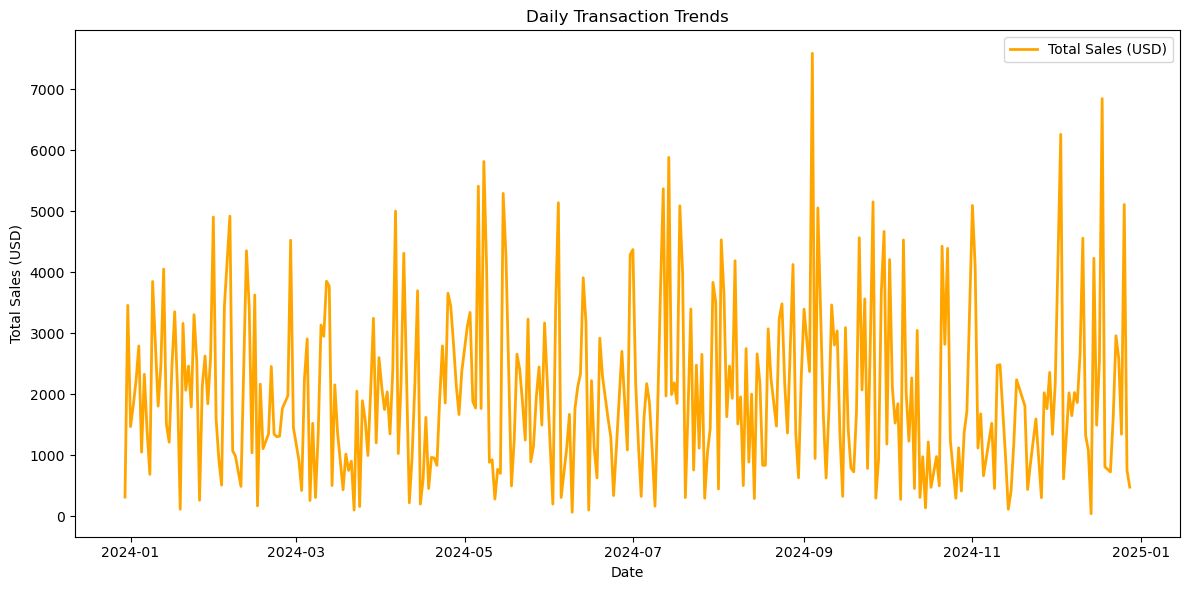

In [70]:
# 3. Transaction Trends Analysis
transactions_by_date = transactions.groupby(transactions['TransactionDate'].dt.date).agg(
    TotalSales=('TotalValue', 'sum'),
    TotalTransactions=('TransactionID', 'count')
)

print("\nTransaction Trends (First 10 Days):")
print(transactions_by_date.head(10))

# Plot Daily Sales Trends
plt.figure(figsize=(12, 6))
transactions_by_date['TotalSales'].plot(color='orange', label='Total Sales (USD)', linewidth=2)
plt.title("Daily Transaction Trends")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.legend()
plt.tight_layout()
plt.show()

In [71]:

# Check data integrity for Transactions: Verify if TotalValue equals Quantity * Price
transactions['IntegrityCheck'] = transactions['Quantity'] * transactions['Price'] == transactions['TotalValue']
integrity_issues = transactions[~transactions['IntegrityCheck']]

# Drop the IntegrityCheck column as it's no longer needed
transactions.drop(columns=['IntegrityCheck'], inplace=True)

# Recalculate TotalValue where it doesn't match Price * Quantity
transactions['TotalValue'] = transactions.apply(
    lambda row: row['Price'] * row['Quantity'] if row['TotalValue'] != row['Price'] * row['Quantity'] else row['TotalValue'],
    axis=1
)


# Count rows with integrity issues for reporting
integrity_issue_count = len(integrity_issues)

print("number of rows in the tranasction data having integrity issues= "+str(integrity_issue_count))


number of rows in the tranasction data having integrity issues= 88


In [72]:
# Recalculate TotalValue where it doesn't match Price * Quantity
transactions['TotalValue'] = transactions.apply(
    lambda row: row['Price'] * row['Quantity'] if row['TotalValue'] != row['Price'] * row['Quantity'] else row['TotalValue'],
    axis=1
)


# merge datasets after removing integrity issues
clean_transactions_products = transactions.merge(products, on='ProductID', how='left')
clean_merged_data = clean_transactions_products.merge(customers, on='CustomerID', how='left')

# Check the first few rows of the cleaned merged dataset
clean_merged_data.head(10)






,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Anna Ball,South America,2022-05-17
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Jeremy Mclaughlin,South America,2024-09-17
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,David Li,North America,2024-01-13
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Miguel Wong,North America,2024-01-30
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Robert Jones,South America,2023-04-19


In [73]:


# Group by Region and ProductID to sum quantities
region_product_sales = (
    clean_merged_data.groupby(["Region", "ProductName"], as_index=False)
    .agg({"Quantity": "sum"})
)


# Identify the product with the highest sales in each region
highest_selling_products = region_product_sales.loc[
    region_product_sales.groupby("Region")["Quantity"].idxmax()
]

highest_selling_products



,Region,ProductName,Quantity
39,Asia,HomeSense T-Shirt,28
67,Europe,ActiveWear Rug,30
170,North America,SoundWave Headphones,37
196,South America,ActiveWear Smartwatch,38


In [74]:
# Group by Region and Category to sum quantities
region_category_sales = (
    merged_data.groupby(["Region", "Category"], as_index=False)
    .agg({"Quantity": "sum"})
)

# Identify the category with the highest sales in each region
highest_selling_categories = region_category_sales.loc[
    region_category_sales.groupby("Region")["Quantity"].idxmax()
]

highest_selling_categories


,Region,Category,Quantity
1,Asia,Clothing,166
7,Europe,Home Decor,167
8,North America,Books,155
12,South America,Books,241


In [75]:
# Sort by Region and Quantity in descending order
sorted_region_category_sales = region_category_sales.sort_values(
    by=["Region", "Quantity"], ascending=[True, False]
)

# Get the top 2 categories per region
top_categories_per_region = (
    sorted_region_category_sales.groupby("Region")
    .head(2)
    .reset_index(drop=True)
)

top_categories_per_region


,Region,Category,Quantity
0,Asia,Clothing,166
1,Asia,Home Decor,142
2,Europe,Home Decor,167
3,Europe,Books,165
4,North America,Books,155
5,North America,Electronics,153
6,South America,Books,241
7,South America,Electronics,198
